Stuart Rossiter, C00284845

# Licensing
Linear Regression on the January 2017 dataset of Lichess Games Copyright (C) 2025 Stuart Rossiter

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.

# Gaussian Naive Bayes Classification - Who is more likely to win a game, based on elo?
Using Gaussian Naive Bayes Classification, an estimate can be made as to who is more likely to win a Lichess game based on the elo of both players.
As always, first we must clean the data, and split it into training and testing data. There are over 10 million games in the acquired dataset. Of these games, a sample of ~300,000 games has been taken. In this case, only the white_elo, black_elo, and winner will be needed.

In [11]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np

data = pandas.read_csv("Lichess_Games_Sample.csv")

black_elo = data["black_elo"].values
white_elo = data["white_elo"].values
result = []

#For ease of modelling. White win is 0, Black win is 1, Draw is 2
for winner in data["result"].values:
    if winner == "1-0":
        result.append(0)
    elif winner == "0-1":
        result.append(1)
    else:
        result.append(.5)

train_black_elo, test_black_elo, train_white_elo, test_white_elo, train_result, test_result = train_test_split(black_elo, white_elo, result, train_size=0.7)

With cleaned and processed data, we can now plot it.

Text(0, 0.5, 'White Elo')

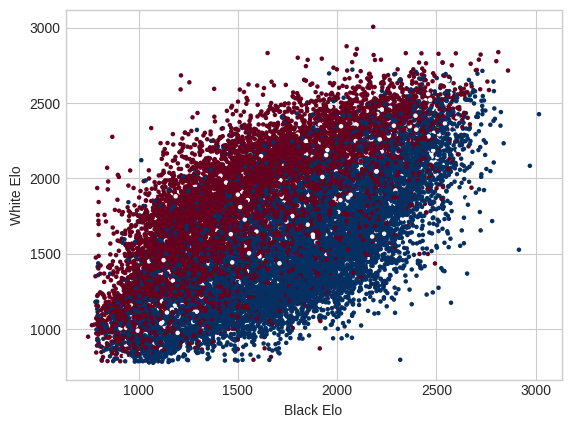

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(train_black_elo, train_white_elo, c=train_result, s=5, cmap='RdBu')
plt.xlabel("Black Elo")
plt.ylabel("White Elo")

Now that our data has been plotted, we can begin to make a model. Here we will use Scikit-Learn's Gaussian Naive Bayes estimator.

In [ ]:
from sklearn.naive_bayes import GaussianNB
